# Satrical Article Analysis Using Naive Bayes

In [194]:
import re
import string
import random
from collections import Counter

# pip install nltk
import nltk
import pandas as pd
import numpy as np
import sklearn
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split



nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = stopwords.words()

bad_title = "Russian Man Recalls Oppressive Days Under Communism When No One Could Speak Freely Or Protest Government,1"
print([hex(ord(c)) for c in bad_title])


['0x52', '0x75', '0x73', '0x73', '0x69', '0x61', '0x6e', '0x20', '0x4d', '0x61', '0x6e', '0x20', '0x52', '0x65', '0x63', '0x61', '0x6c', '0x6c', '0x73', '0x20', '0x4f', '0x70', '0x70', '0x72', '0x65', '0x73', '0x73', '0x69', '0x76', '0x65', '0x20', '0x44', '0x61', '0x79', '0x73', '0x20', '0x55', '0x6e', '0x64', '0x65', '0x72', '0x20', '0x43', '0x6f', '0x6d', '0x6d', '0x75', '0x6e', '0x69', '0x73', '0x6d', '0x20', '0x57', '0x68', '0x65', '0x6e', '0x20', '0x4e', '0x6f', '0x20', '0x4f', '0x6e', '0x65', '0x20', '0x43', '0x6f', '0x75', '0x6c', '0x64', '0x20', '0x53', '0x70', '0x65', '0x61', '0x6b', '0x20', '0x46', '0x72', '0x65', '0x65', '0x6c', '0x79', '0x20', '0x4f', '0x72', '0x20', '0x50', '0x72', '0x6f', '0x74', '0x65', '0x73', '0x74', '0x20', '0x47', '0x6f', '0x76', '0x65', '0x72', '0x6e', '0x6d', '0x65', '0x6e', '0x74', '0x2c', '0x31']


[nltk_data] Downloading package punkt to C:\Users\Ty
[nltk_data]     Lovgren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Ty
[nltk_data]     Lovgren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ty
[nltk_data]     Lovgren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Part 1: Data Preprocessing

In [195]:


stop_words = set(stopwords.words('english'))

def clean_data(review):

    review = unicodedata.normalize("NFKD", review)
    # Remove emojis
    emoji_pattern = re.compile("[" 
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    
    review = review.lower()
    review = emoji_pattern.sub(r'', review)

    # Expand some common contractions (safe with word boundaries)
    contractions = {
        r"\bcan't\b": "cannot",
        r"\bdon't\b": "do not",
        r"\bdoesn't\b": "does not",
        r"\bdidn't\b": "did not",
        r"\baren't\b": "are not",
        r"\bwasn't\b": "was not",
        r"\bweren't\b": "were not",
        r"\bhaven't\b": "have not",
        r"\bhasn't\b": "has not",
        r"\bhadn't\b": "had not",
        r"\bwon't\b": "will not",
        r"\bwouldn't\b": "would not",
        r"\bi'm\b": "i am",
        r"\byou're\b": "you are",
        r"\bthey're\b": "they are",
        r"\bwe're\b": "we are",
        r"\bit's\b": "it is",
        r"\bthat's\b": "that is",
        r"\bthere's\b": "there is",
        r"\bwho's\b": "who is"
    }

    for pattern, replacement in contractions.items():
        review = re.sub(pattern, replacement, review)

    # Tokenize the sentence
    words = word_tokenize(review)

    # Remove stopwords and non-alphabetic words
    words = [word for word in words if re.match(r'^[a-zA-Z]+$', word) and word not in stop_words]

    return ' '.join(words)

In [196]:
###########################
# Onion Article Importing #
###########################

# Onion Dataset columns (post rename): title, satirical
# Satirical column key:
# 0 = onion like article
# 1 = onion article

# Converting onion & like onion articles csv into df
onion_dataset = pd.read_csv("./Data_Exploration/Satire_HeadLines_Source/OnionOrNot.csv")

# Renaming columns for consistency
onion_dataset = onion_dataset.rename(columns= {"text": "title", "label": "satirical"})

# Collecting indexes of like onion articles
non_onion_articles = onion_dataset[onion_dataset["satirical"] == 0].index

# Dropping like onion articles from the dataset
onion_articles = onion_dataset.drop(non_onion_articles)


##########################
# Real Article Importing #
##########################

# Converting real articles source csv into df
real_articles = pd.read_csv("./Data_Exploration/Genuine_HeadLines_Source/True.csv")

# Dropping non-relevant details
real_articles = real_articles.drop(columns= {"text","subject","date"})

# Adding satirical key to mark articles as real articles
real_articles["satirical"] = 0

# Logging 
# print(onion_sources.columns)
# print(onion_sources.iloc[0])
# print(real_sources.columns)
# print(real_sources.iloc[0])


# Columns: title, satirical
# satirical column key:
# 0 = non-satiricial article
# 1 = satirical article

# Merging of real and onion articles
combined_articles = pd.concat([onion_articles, real_articles], ignore_index=True)


# Cleaning the title column
combined_articles['cleaned_title'] = combined_articles['title'].apply(clean_data)

# Dropping non-cleaned titles
combined_articles = combined_articles[['cleaned_title', 'satirical']]

In [197]:
#  Removal of stop words from combined article dataset
combined_articles['no_sw'] = combined_articles['cleaned_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

## To Do: Do we need these next 3

In [198]:
# find value counts of all words in all data points
counter = Counter()
for text in combined_articles["no_sw"].values:
    for word in text.split():
        counter[word] += 1

# creates a set of the 10 most common words amongst all reviews
FREQWORDS = set([w for (w, wc) in counter.most_common(10)])

In [199]:
def remove_freqwords(text, freqwords):
    '''Given a tweet that has been cleaned, returns the tweet without the most frequently appearing words'''
    for word in freqwords:
        text = re.sub(word, " ", text)

    return text


# remove frequent words that do not add value to the model
combined_articles["no_sw"] = combined_articles["no_sw"].apply(lambda text: remove_freqwords(text, FREQWORDS))

In [200]:
# Pasing data into new DF in preperation for tokenization
tokenized_data = combined_articles.drop(columns=['cleaned_title'])

# Establishing column names
tokenized_data.columns = ['satirical', 'cleaned_title']

# Tokenizing the data
tokenized_data["cleaned_title"] = tokenized_data["cleaned_title"].apply(lambda t: t.split())


Part 2: Naive Bayes Implementation

In [201]:
import math
import random


class NaiveBayesModel:
    '''Class representing the implementation of the Naive Bayes model'''

    def __init__(self) -> None:
        self.occurrence_table = {}
        self.probability_table = {}
        self.labels = []
        

    def train_model(self, data, labels):
        '''Runs the training process for the model, building the occurrence table and probability table'''
        self.build_occurrence_table(data, labels)
        self.build_probability_table()


    def build_occurrence_table(self, data, labels):
        '''Private function to create the occurrence table given the training data and labels'''
        for words, label in zip(data,labels):
            for word in words:
                if word not in self.occurrence_table.keys():
                    self.occurrence_table[word] = {0: 1, 1: 1}
                self.occurrence_table[word][label] += 1

                
        

    def build_probability_table(self):
        '''Private function to create the probability table based on the occurrence table'''
        for word in self.occurrence_table:
            total = self.occurrence_table[word][0] + self.occurrence_table[word][1]
            self.probability_table[word] = {
                0: self.occurrence_table[word][0] / total,
                1: self.occurrence_table[word][1] / total
            }
            
            

    def predict(self, variables):
        '''Takes a set of variables, and predicts the class they should belong to'''
        predictions = []
        for words in variables:
            prob_0 = 1
            prob_1 = 1
            for word in words:
                if word in self.probability_table:
                    prob_0 *= self.probability_table[word][0]
                    prob_1 *= self.probability_table[word][1]
                else:
                    smoothing = 1 / (len(self.probability_table) + len(words))
                    prob_0 *= smoothing
                    prob_1 *= smoothing

            if prob_0 > prob_1:
                predictions.append(0)
            elif prob_1 > prob_0:
                predictions.append(1)
            else:
                predictions.append(random.randint(0, 1))

        return predictions
                




In [ ]:
# Save raw titles to allow for misclassification logging
# X_raw is the cleaned, untokenized title
X_raw = combined_articles['cleaned_title'] 
y = combined_articles['satirical']

# Preparing the data for the training and testing of a Naive Bayes Model
# Split both tokenized and raw versions together
X_raw_train, X_raw_test, data_train, data_test, label_train, label_test = train_test_split(
    X_raw,
    tokenized_data["cleaned_title"],
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42
)


# Creating the model
naivebayes = NaiveBayesModel()

# Training the model
naivebayes.train_model(data_train, label_train)

# Testing the model
predicted_data = naivebayes.predict(data_test) 



KeyError: 'title'

[[4250   33]
 [ 373 1428]]


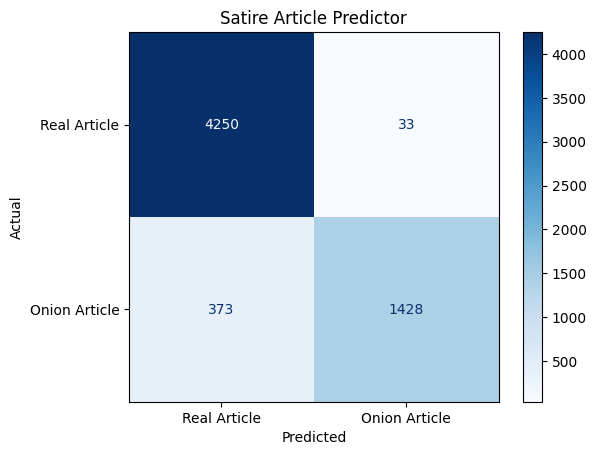

Accuracy: 0.9332675871137409
Precision: 0.936514255710631
Recall: 0.9332675871137409
F Score: 0.9310636149393422


In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import pandas as pd

# Confusion matrix and evaluation metrics
conf_matrix = metrics.confusion_matrix(label_test, predicted_data, labels=[0, 1])
print(conf_matrix)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Real Article", "Onion Article"])
display.plot(cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Satire Article Predictor")
plt.show()

# Evaluation scores
accuracy = metrics.accuracy_score(label_test, predicted_data)
print(f"Accuracy: {accuracy}")
precision = metrics.precision_score(label_test, predicted_data, average="weighted")
print(f"Precision: {precision}")
recall = metrics.recall_score(label_test, predicted_data, average="weighted")
print(f"Recall: {recall}")
f_score = metrics.f1_score(label_test, predicted_data, average="weighted")
print(f"F Score: {f_score}")

# Extract and save misclassified titles
label_map = {0: "Real Article", 1: "Onion Article"}

misclassified_df = pd.DataFrame({
    'title': X_raw_test,  # Must be the original titles aligned with label_test
    'actual': [label_map[val] for val in label_test],
    'predicted': [label_map[val] for val in predicted_data]
})

misclassified_only = misclassified_df[misclassified_df['actual'] != misclassified_df['predicted']]
misclassified_only.to_csv("misclassified_titles.csv", index=False)

